<a href="https://colab.research.google.com/github/MonicaNahabwe/Capstone_2-Data-Wrangling/blob/main/Forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation and customer analytics

## Transaction Data
Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis.

In [ ]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
import datetime
from datetime import date

/Users/monicanahabwe/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Read the transcaction data into python

In [ ]:
## Transaction data
df1=pd.read_excel("https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx")
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Check for missing numbers

In [ ]:
## missing data
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no any missing data in transaction dataset

#### Check for and remove all duplicates

In [ ]:
# Examining the duplicates and removing them
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

### Understand the data


In [ ]:
df1.shape

(264835, 8)

In [ ]:
# look out for correctly specified data formats
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


Here we observe that the date is specified as int yet it is supposed to be date, thus i import date and change it

##### Change Date into date format

In [ ]:
origin = pd.Timestamp("30/12/1899")
df1["DATE"] = df1["DATE"].apply(lambda x: origin + pd.Timedelta(days=x))
df1.head()

/var/folders/cl/8nh76scs57q74tk5xkdy3g2m0000gn/T/ipykernel_2292/1882255304.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  origin = pd.Timestamp("30/12/1899")


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Checking for unique values

Now its time to identify outlies

In [ ]:
df1.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

Will use the boxplot to visualise the outliers

In [ ]:
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


### Checking and Understanding Outliers

For Prod_Qty, the mean is 1.9 yet the max is 200


For Total_sales, the mean is 7.3  yet the max is 650


In [ ]:
df1[df1.PROD_QTY > 10]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We identify the same customer purchasing the same product and could be the reason for the outlier in Total sales

#### Remove outliers

In [ ]:
df1 =df1[df1['PROD_QTY'] < 10].reset_index(drop=True)
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000
mean,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351
std,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
df1.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72636
TXN_ID            263125
PROD_NBR             114
PROD_NAME            114
PROD_QTY               5
TOT_SALES            111
dtype: int64

In [ ]:
df1.shape

(264833, 8)

If the data has 264833 rows how come the txn_id is 263125

In [ ]:
264833-263125

1708

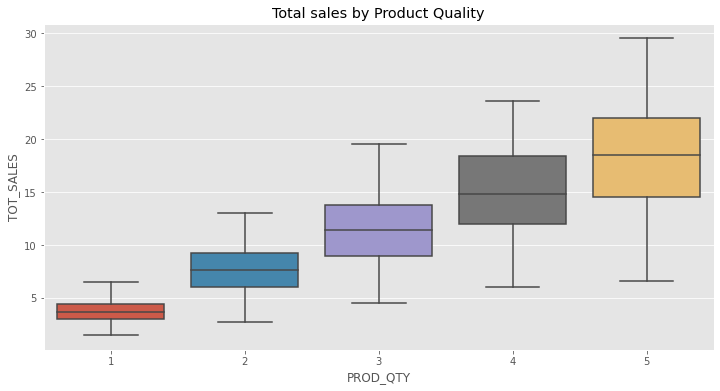

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1, y="TOT_SALES", x="PROD_QTY")
plt.title("Distribution of Total sales by Product Quality");

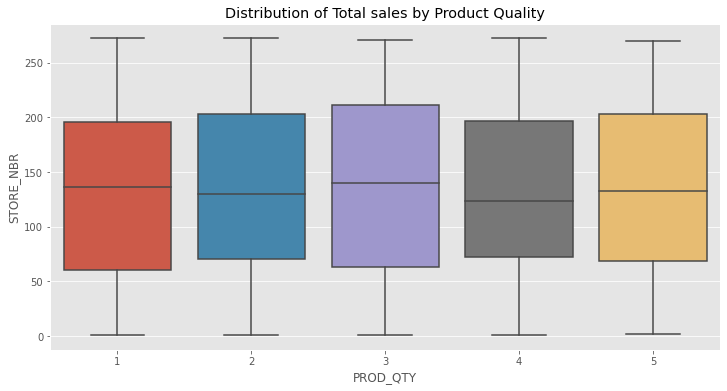

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1, y="STORE_NBR", x="PROD_QTY")
plt.title("Distribution of store number by Product Quality");

There are no outliesr in the above

In [ ]:
#df1["PROD_NAME"].value_counts()[:30]

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3183
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

### creating other Colums

#### Pack size

In [ ]:
def pack_size(grp):
    string = grp["PROD_NAME"]
    num = []
    for i in string:
        if i.isdigit():
            num.append(i)
    number = "".join(num)
    return int(number)

In [ ]:
def pack_size(grp):
    string = grp["PROD_NAME"]
    size = []
    for i in string:
        if i.isdigit():
            size.append(i)
    number = "".join(size)
    return int(number)

In [ ]:
%%time
df1["PACK_SZ"] = df1.apply(pack_size,axis=1)
df1.head()

CPU times: user 1.77 s, sys: 52.9 ms, total: 1.83 s
Wall time: 1.83 s


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


### Brand Name

I will use the first name in the Product Name colum as a brand name

In [ ]:
def Brand_name (bra):
    return bra["PROD_NAME"].split()[0]

In [ ]:
%%time
df1["BRAND_NAME"] =df1.apply(Brand_name,axis=1)
df1.head()

CPU times: user 1.49 s, sys: 33.4 ms, total: 1.53 s
Wall time: 1.53 s


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


## **Customer Data**

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

#### Read the data into python

In [ ]:
## customer Data
df2=pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv")
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### Missing Values

In [ ]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Understanding the Data

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df2.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [ ]:
df2.shape

(72637, 3)

### Merge the Data

In [ ]:
df = df1.join(df2.set_index('LYLTY_CARD_NBR'), on = 'LYLTY_CARD_NBR')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
df.shape

(264833, 12)